In [84]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import norm
%matplotlib notebook

In [7]:
def gaussian(x,mu,sigma):
    return np.exp(-(x - mu)**2/(2*float(sigma)**2))

<IPython.core.display.Javascript object>


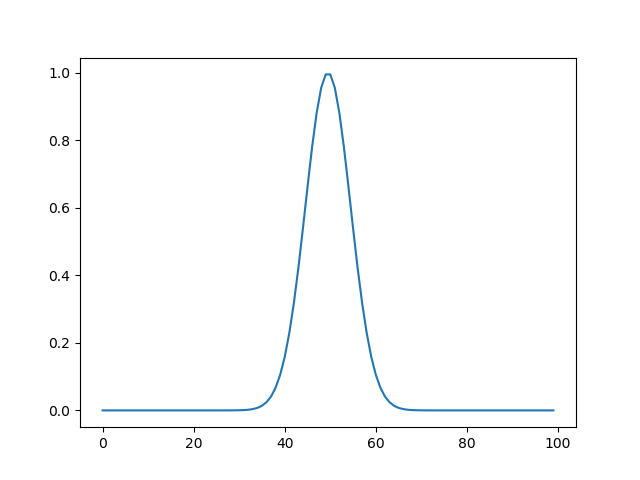

In [8]:
plt.figure()
plt.plot(gaussian(np.linspace(-1,1,100),0.0,0.1))

In [62]:
def rbf_kernel(x,xp,theta):
    if len(x.shape)<2:
        x = np.matrix(x).T
    if len(xp.shape)<2:
        xp = np.matrix(xp).T
    r = np.exp(float(theta[0]))*np.exp(-cdist(x,xp,'sqeuclidean')/(2*np.exp(float(theta[1]))**2))
    r += 1E-6*np.eye(len(x))
    return r

def draw_fun(npoints,theta):
    axis = np.linspace(-1,1,npoints)
    kernel = rbf_kernel(axis,axis,np.array([np.log(theta[0]), np.log(theta[1])]))
    return _draw_fun(kernel)

def _draw_fun(kernel):
    return np.random.multivariate_normal(np.zeros(kernel.shape[0],dtype=kernel.dtype), kernel)

def draw_fun_2d(npoints,theta):
    axis = np.linspace(-1,1,int(npoints))
    axis2 = np.linspace(-1,1,int(npoints))
    (a,b) = np.meshgrid(axis,axis2)
    Xspace = np.column_stack([np.ravel(a),np.ravel(b)])
    r = np.random.multivariate_normal(0*Xspace[:,0],
                                  rbf_kernel(Xspace,Xspace,np.array([np.log(1.0), np.log(theta)])))
    return r.reshape((npoints,npoints))

<IPython.core.display.Javascript object>


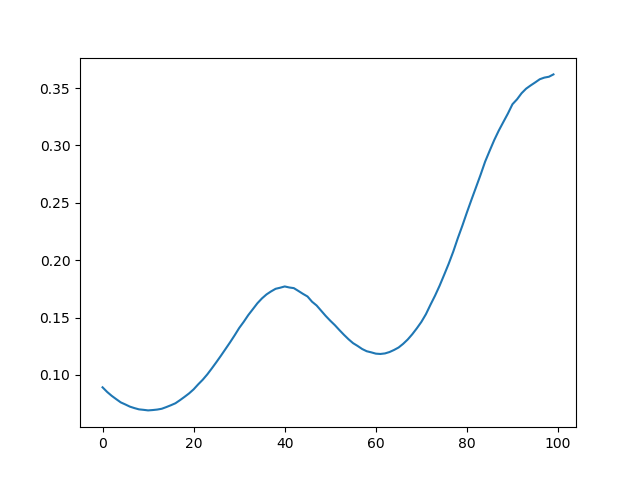

In [58]:
plt.figure()
plt.plot(0.5*np.tanh(draw_fun(100,[1.0, 0.5])) + 0.5)

In [133]:
def random_exciting_image(npoints,sigma,theta):
    x_axis = np.linspace(-1,1,npoints)
    x_fun = np.broadcast_to(np.expand_dims(gaussian(x_axis,0.0,sigma),0),(npoints,npoints))
    img = draw_fun_2d(npoints,theta)
    return (np.tanh(0.8*img)+1.0)*x_fun

def random_boring_image(npoints,sigma,sigma2):
    x_axis = np.linspace(-1,1,npoints)
    x_fun = np.broadcast_to(np.expand_dims(gaussian(x_axis,0.0,sigma),0),(npoints,npoints))
    x_fun2 = np.broadcast_to(np.expand_dims(gaussian(x_axis,0.0,sigma2),0),(npoints,npoints))
    return x_fun * x_fun2.T

def random_img_mixture(npoints,sigma,sigma2,theta,alpha):
    img1 = random_boring_image(npoints,sigma,sigma2)
    img2 = random_exciting_image(npoints,sigma,theta)
    r = img1 + alpha*img2
    return r/r.max()

def random_power(npoints):
    return np.random.gamma(1.5,scale=.3,size=(npoints,))

<IPython.core.display.Javascript object>


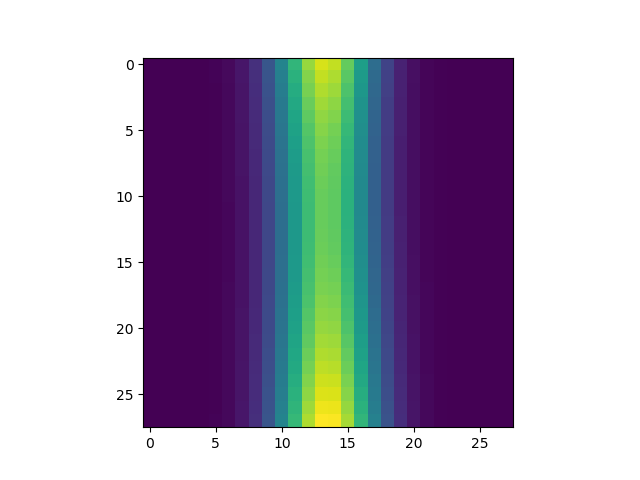

In [92]:
plt.figure()
plt.imshow(random_exciting_image(28,0.2,2.0))

<IPython.core.display.Javascript object>


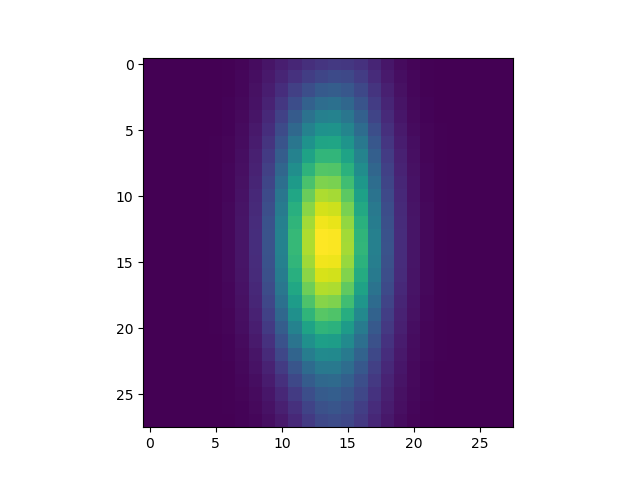

In [101]:
plt.figure()
plt.imshow(random_boring_image(28,0.2,0.5) + 0.1*random_exciting_image(28,0.2,.3))

<IPython.core.display.Javascript object>


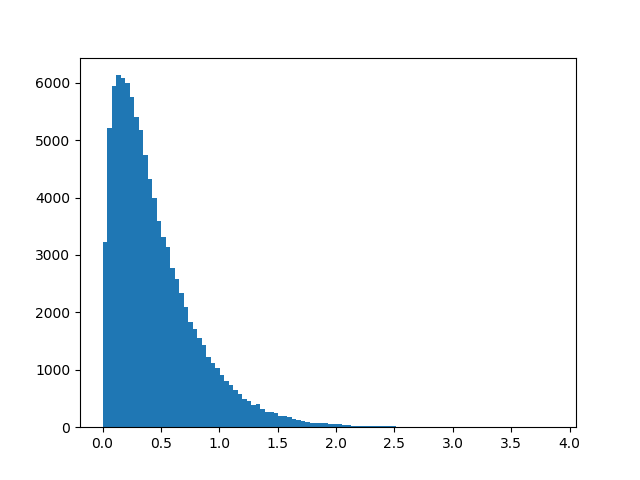

In [144]:
plt.figure()
plt.hist(random_power(100000),100);

<IPython.core.display.Javascript object>


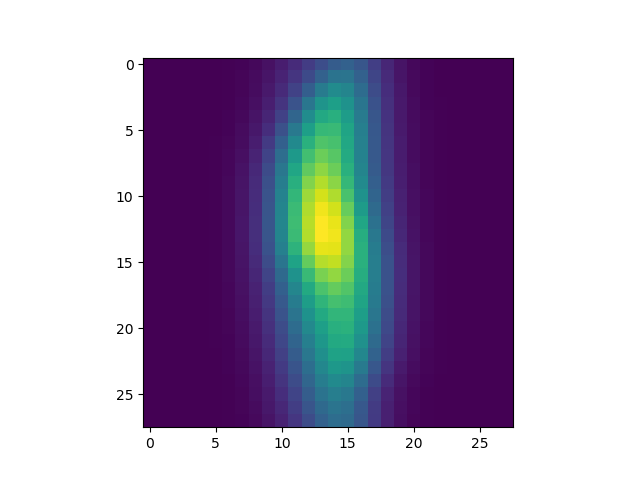

In [169]:
plt.figure()
plt.imshow(random_img_mixture(28,0.2,0.6,0.3,random_power(1)))

In [187]:
N = 1000
x = np.zeros((N,28,28),dtype=np.float32)
y = np.zeros((N,),dtype=np.float32)
for k in range(N):
    y[k] = random_power(1).astype(np.float32)
    x[k,:,:] = random_img_mixture(28,0.2,0.65,0.28,y[k]).astype(np.float32)

0
100
200


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


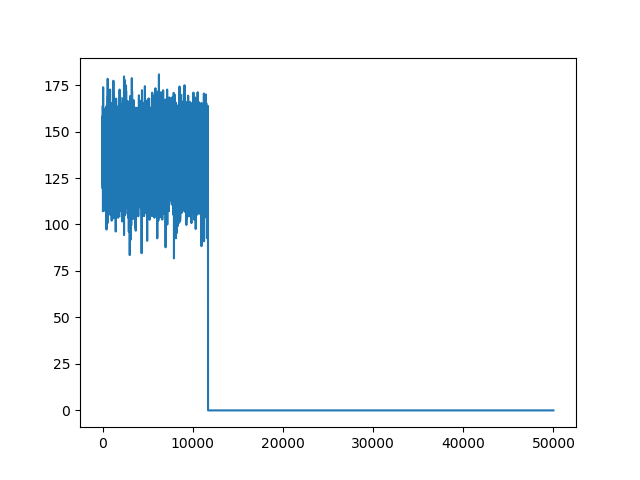

In [179]:
plt.figure()
plt.plot(np.sum(np.sum(x,axis=1),axis=1))

In [181]:
x = x[:10000,:,:]
y = y[:10000]

In [184]:
np.save('fake_images.npy',x)
np.save('fake_powers.npy',y)

In [185]:
pwd

'/Users/fdfuller/SLAC National Accelerator Laboratory/Fuller Group - Documents/Code/Frank/vae/notebooks'

In [173]:
np.ravel_multi_index((2, 0), dims=(15, 15), order='C')

30

<IPython.core.display.Javascript object>


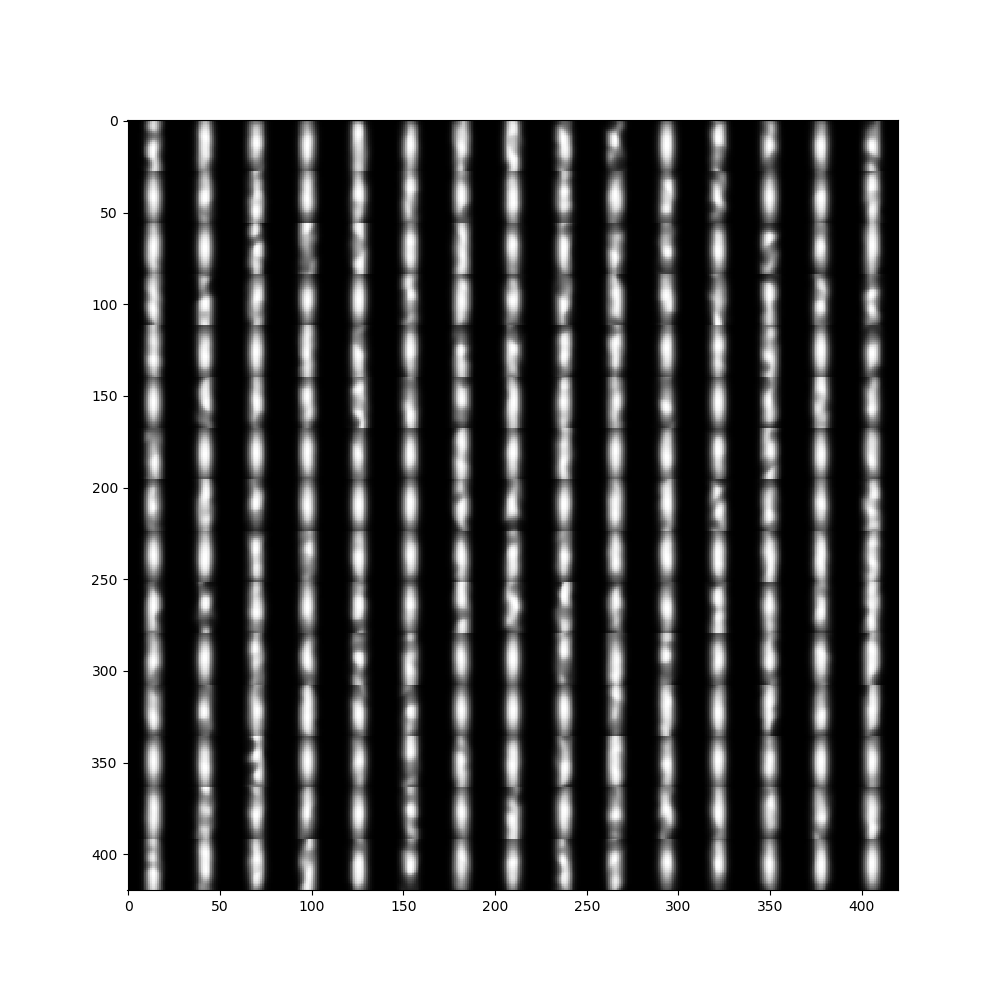

In [174]:
# # display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
img_size = 28
figure = np.zeros((img_size * n, img_size * n))
# grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
# grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
grid_x = np.linspace(0.1, 1.0, n)


for i, yi in enumerate(grid_x):
    for j, _ in enumerate(grid_x):
        k = np.ravel_multi_index((i, j), dims=(n, n), order='C')
        img = data_set[k,:,:]
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')